In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("height-weight.csv")

In [123]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [125]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


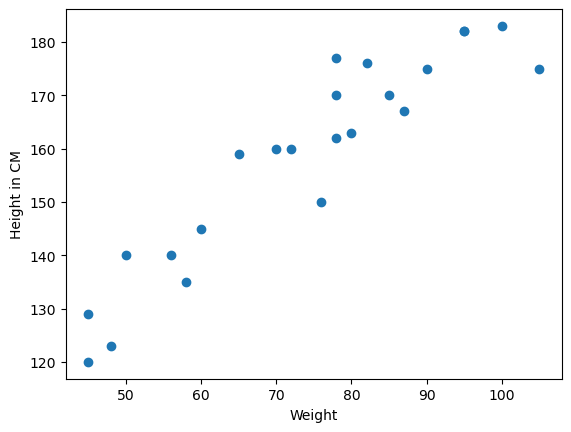

In [127]:
plt.scatter(df.Weight , df.Height)
plt.xlabel("Weight")
plt.ylabel("Height in CM")
plt.show()

In [129]:
# Problem statement : Predict height based on weight

In [131]:
# Dividing the weight into x and y 
x = df[["Weight"]]
y = df[["Height"]]

In [133]:
from sklearn.model_selection import train_test_split

In [154]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=1) 

In [156]:
#scaling is optional >> standardization   
# fit_transform on train data while only fit on train data if transform is done it leads to data leakage.
# Most of the Ml model use standard sacler as it works with normal distribution.

In [158]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()

In [152]:
X_train.shape

(17, 1)

In [266]:
# Scaling should be done after train test and split 
# target variable should not be scaled 
# avoid scaling categorical features
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data using the same scaler

In [268]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [270]:
X_test # scaling is optional

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

In [180]:
# model Traning

In [182]:
from sklearn.linear_model import LinearRegression
# fit intercept >> The best fit line will have intercept , by default it is true >> if false model will be build by origin
# copy_X >> copy the X_train and then build the model it will not modify the original data
#  n_jobs >> -1 means using all processors.
# positive >> When set to True, forces the cofficient to be positive.
# fit >> train the model
# predict >> test the model

In [248]:
regressor = LinearRegression() 

In [250]:
regressor

LinearRegression()

In [252]:
regressor.fit(x_train , y_train)

LinearRegression()

In [254]:
regressor.coef_

array([[17.7307072]])

In [256]:
regressor.intercept_

array([160.])

In [258]:
print("The slope or coeff of model is: " , regressor.coef_)
print("The intercept of model is: " , regressor.intercept_)

The slope or coeff of model is:  [[17.7307072]]
The intercept of model is:  [160.]


In [260]:
# prediction on test data

In [272]:
regressor.predict(X_test)

array([[125.99571945],
       [147.97567266],
       [142.48068436],
       [186.44059077],
       [172.15362118],
       [131.49070775]])

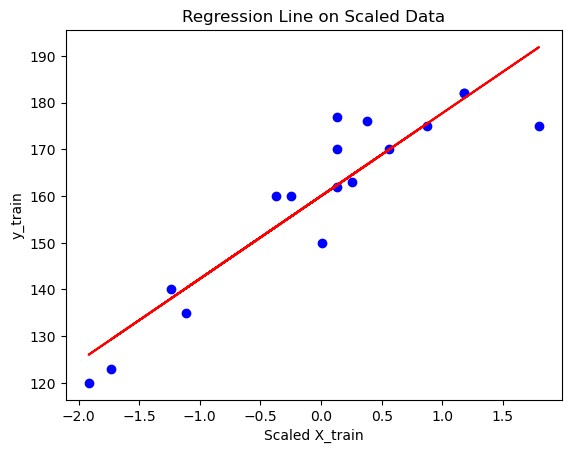

In [276]:
plt.scatter(X_train, y_train, color='blue')  # Training data points
plt.plot(X_train, regressor.predict(X_train), color='red')  # Regression line
plt.xlabel("Scaled X_train")
plt.ylabel("y_train")
plt.title("Regression Line on Scaled Data")
plt.show()

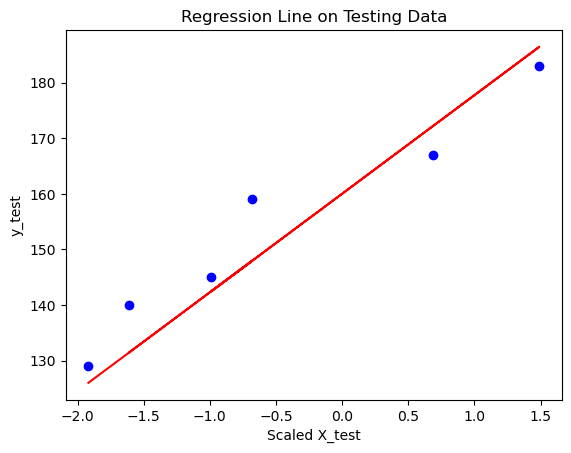

In [280]:
plt.scatter(X_test, y_test, color='blue')  # Testing data points
plt.plot(X_test, regressor.predict(X_test), color='red')  # ✅ Corrected: Use X_test here
plt.xlabel("Scaled X_test")
plt.ylabel("y_test")
plt.title("Regression Line on Testing Data")
plt.show()

In [282]:
 # performance matrix
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
y_pred = regressor.predict(X_test)

In [286]:
 mean_absolute_error(y_test , y_pred)

5.608571289304824

In [288]:
r2_score(y_test , y_pred)

0.872103617425661

In [290]:
mean_absolute_error(y_test , y_pred)

5.608571289304824

In [292]:
error = y_test - y_pred

In [294]:
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


/var/folders/jj/vdqfq3z908zb5hh4kskqxxxr0000gn/T/ipykernel_9574/2146445022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error) # approx normal distribution


<Axes: ylabel='Density'>

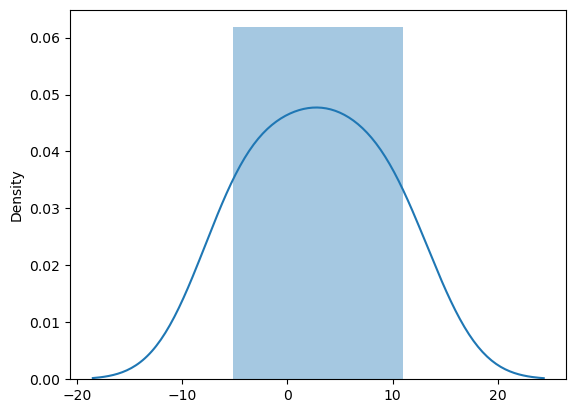

In [302]:
import seaborn as sns 
sns.distplot(error) # approx normal distribution